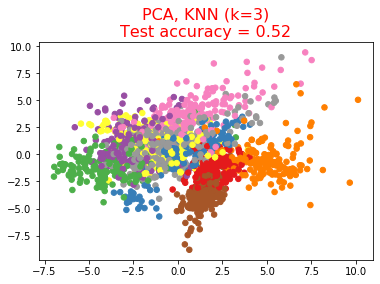

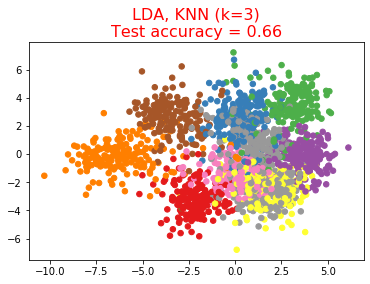

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

n_neighbors = 3
random_state = 0  # 随机数种子

# Load Digits dataset
dataset = datasets.load_digits()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test =
train_test_split(X, y, test_size=0.5, stratify=y,
                 random_state=random_state)

standard_pca = StandardScaler()  # 均值方差归一化
pca_2 = PCA(n_components=2, random_state=random_state)
pca = Pipeline([('standard_pca', standard_pca), ('pca_2', pca_2)])

standard_lda = StandardScaler()
lda_2 = LinearDiscriminantAnalysis(n_components=2)
lda = Pipeline([('standard_lda', standard_lda), ('lda_2', lda_2)])

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [('PCA', pca), ('LDA', lda)]

for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    model.fit(X_train, y_train)
    knn.fit(model.transform(X_train), y_train)
    acc_knn = knn.score(model.transform(X_test), y_test)
    X_embedded = model.transform(X)

    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap='Set1')
    plt.title("{}, KNN (k={})\nTest accuracy = {:.2f}".format(name,
                                                              n_neighbors,
                                                              acc_knn), color='red', size=16)
plt.show()